# GFC Analysis

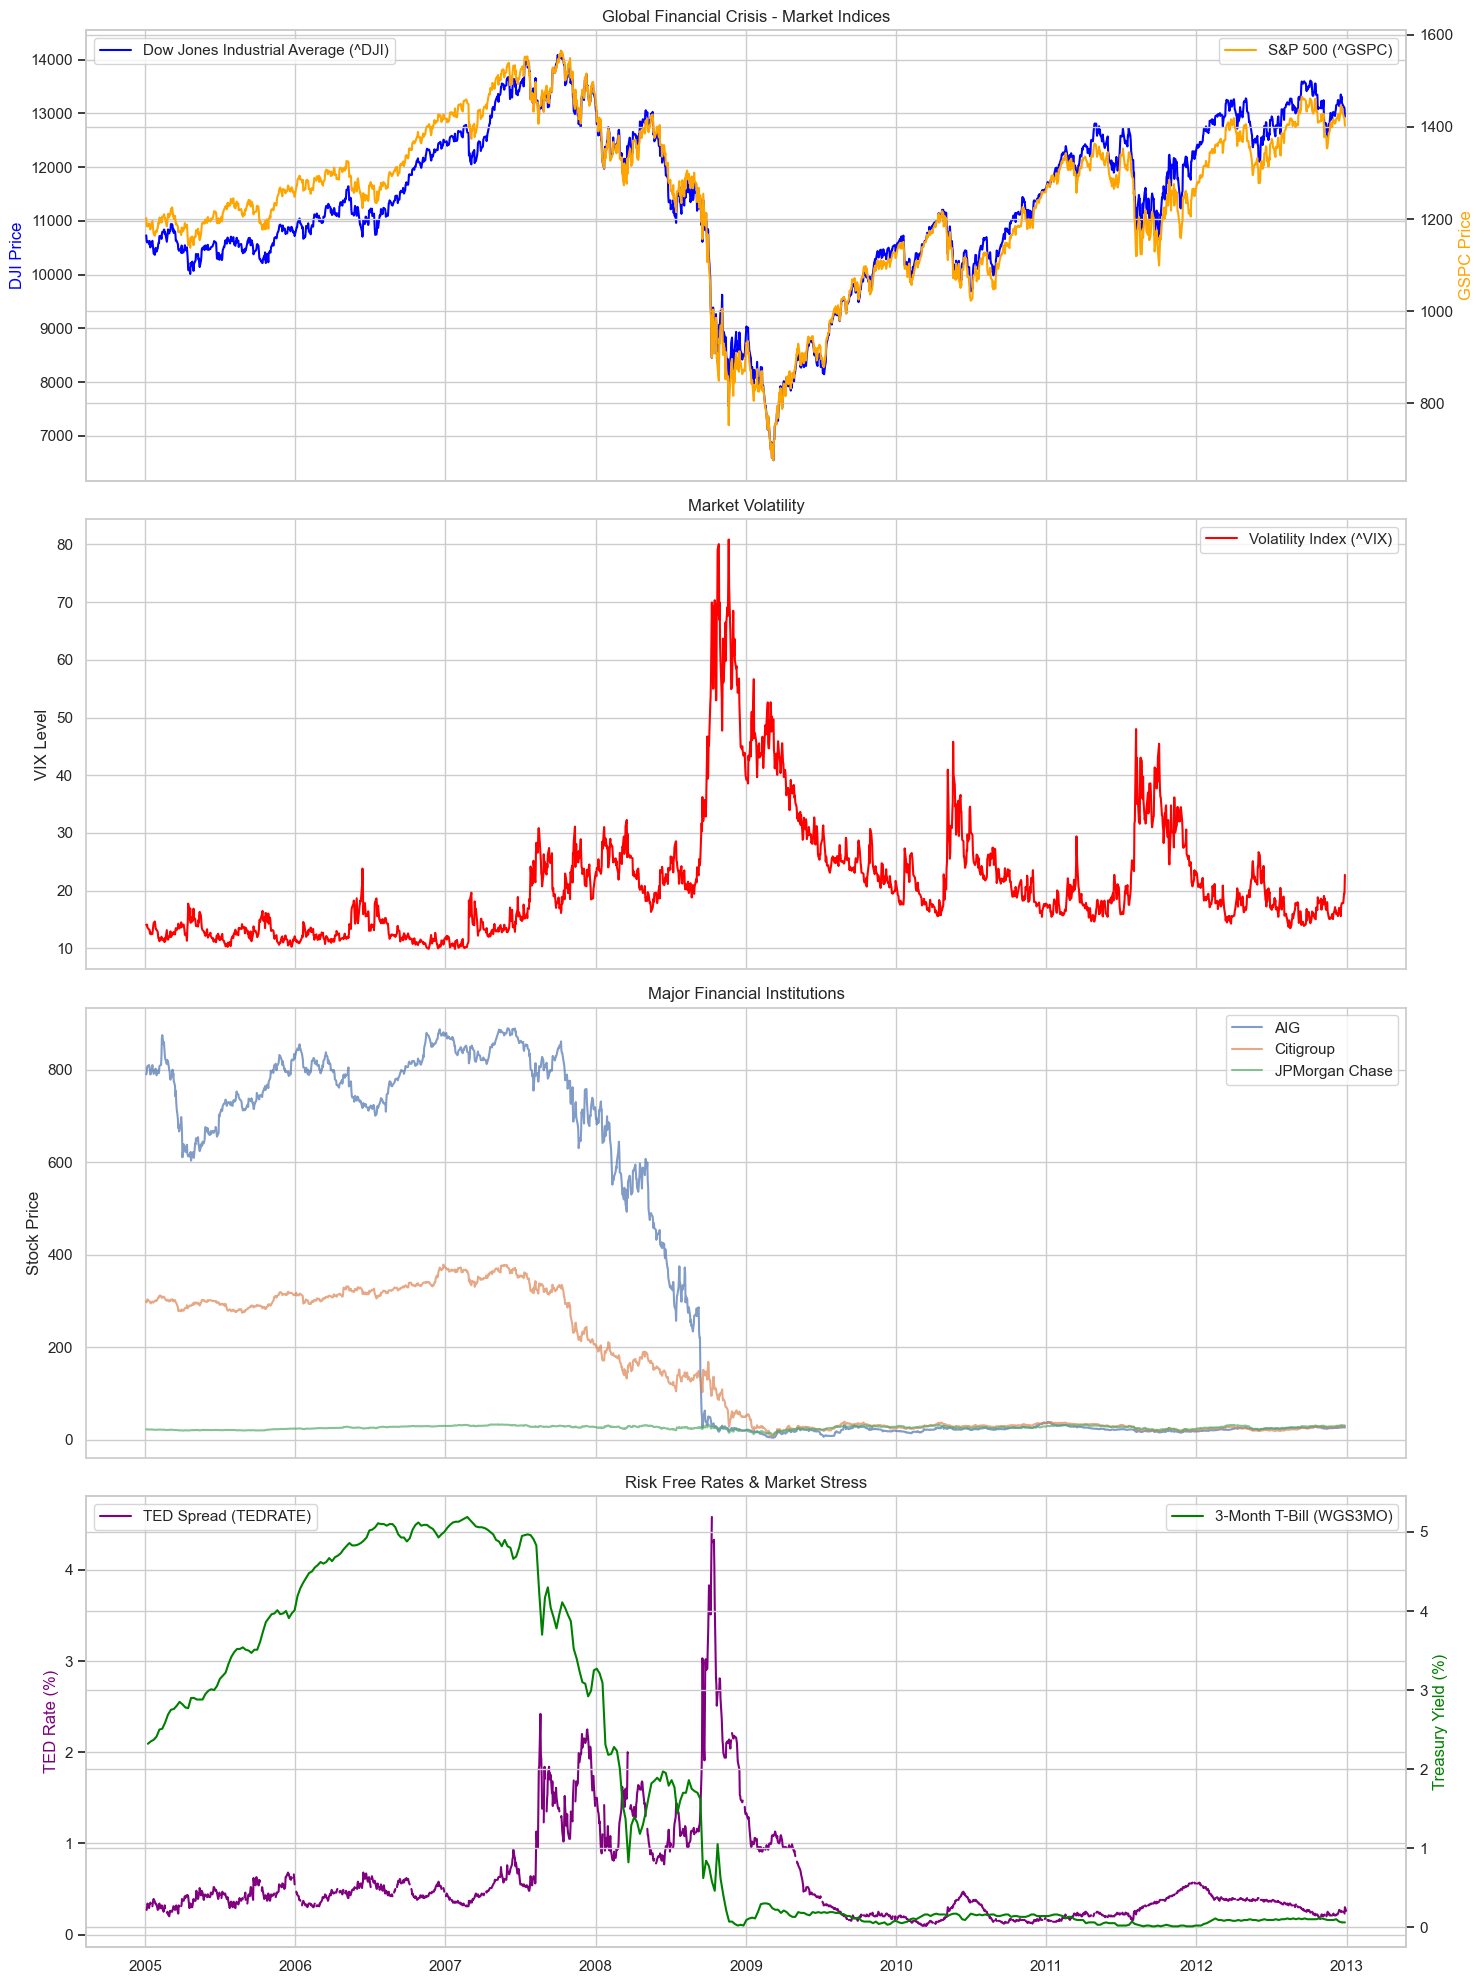

All datasets loaded and plotted successfully.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set plotting style
sns.set_theme(style="whitegrid")
def load_financial_data(filepath, ticker_name):
    # Stock/Index CSVs have 3 header rows. We'll skip them and set names.
    df = pd.read_csv(filepath, skiprows=3, names=['Date', ticker_name, 'High', 'Low', 'Open', 'Volume'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    return df[ticker_name]
# 1. Read stock/index data from the 'data' directory
dji = load_financial_data("../data/^DJI.csv", "DJI")
gspc = load_financial_data("../data/^GSPC.csv", "GSPC")
vix = load_financial_data("../data/^VIX.csv", "VIX")
aig = load_financial_data("../data/AIG.csv", "AIG")
c_stock = load_financial_data("../data/C.csv", "Citigroup")
jpm = load_financial_data("../data/JPM.csv", "JPMorgan")
# 2. Read rate data
tedrate = pd.read_csv("../data/TEDRATE.csv", na_values='.')
tedrate['observation_date'] = pd.to_datetime(tedrate['observation_date'])
tedrate = tedrate.set_index('observation_date')
wgs3mo = pd.read_csv("../data/WGS3MO.csv")
wgs3mo['observation_date'] = pd.to_datetime(wgs3mo['observation_date'])
wgs3mo = wgs3mo.set_index('observation_date')
# 3. Create multi-panel plot for comparison
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)
# Panel 1: Market Indices (DJI on left y-axis, GSPC on right y-axis)
axes[0].plot(dji, label='Dow Jones Industrial Average (^DJI)', color='blue')
axes[0].set_ylabel('DJI Price', color='blue')
ax0_twin = axes[0].twinx()
ax0_twin.plot(gspc, label='S&P 500 (^GSPC)', color='orange')
ax0_twin.set_ylabel('GSPC Price', color='orange')
axes[0].set_title('Global Financial Crisis - Market Indices')
axes[0].legend(loc='upper left')
ax0_twin.legend(loc='upper right')
# Panel 2: Volatility (VIX)
axes[1].plot(vix, label='Volatility Index (^VIX)', color='red')
axes[1].set_ylabel('VIX Level')
axes[1].set_title('Market Volatility')
axes[1].legend()
# Panel 3: Financial Stocks
axes[2].plot(aig, label='AIG', alpha=0.7)
axes[2].plot(c_stock, label='Citigroup', alpha=0.7)
axes[2].plot(jpm, label='JPMorgan Chase', alpha=0.7)
axes[2].set_ylabel('Stock Price')
axes[2].set_title('Major Financial Institutions')
axes[2].legend()
# Panel 4: Interest Rates (TED Spread on left, T-Bill on right)
axes[3].plot(tedrate, label='TED Spread (TEDRATE)', color='purple')
axes[3].set_ylabel('TED Rate (%)', color='purple')
ax3_twin = axes[3].twinx()
ax3_twin.plot(wgs3mo, label='3-Month T-Bill (WGS3MO)', color='green')
ax3_twin.set_ylabel('Treasury Yield (%)', color='green')
axes[3].set_title('Risk Free Rates & Market Stress')
axes[3].legend(loc='upper left')
ax3_twin.legend(loc='upper right')
plt.xlabel('Date')
plt.tight_layout()
plt.show()
print("All datasets loaded and plotted successfully.")